In [ ]:
### download files
!git clone https://github.com/ITensor/ITensor
!git clone https://github.com/nlohmann/json
!git clone https://github.com/ToruNiina/toml11
!git clone https://github.com/ShimpeiGoto/RPMPS-T

Cloning into 'ITensor'...
remote: Enumerating objects: 28243, done.
remote: Total 28243 (delta 0), reused 0 (delta 0), pack-reused 28243
Receiving objects: 100% (28243/28243), 12.44 MiB | 20.03 MiB/s, done.
Resolving deltas: 100% (20503/20503), done.
Cloning into 'json'...
remote: Enumerating objects: 74327, done.
remote: Total 74327 (delta 0), reused 0 (delta 0), pack-reused 74327
Receiving objects: 100% (74327/74327), 236.93 MiB | 27.04 MiB/s, done.
Resolving deltas: 100% (59375/59375), done.
Cloning into 'toml11'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 4556 (delta 17), reused 22 (delta 10), pack-reused 4516
Receiving objects: 100% (4556/4556), 1.18 MiB | 5.23 MiB/s, done.
Resolving deltas: 100% (3190/3190), done.
Cloning into 'RPMPS-T'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (273/273), done.
remote: Compressing objects: 100% (204/204), done

In [ ]:
### compile ITensor
%cd ITensor/
## ITensor v3.1.6
!git checkout d4d05d9b8a2b6fed6bba8e2c3bf1633d5d0ab6ce
!sed \
 -e 's/PLATFORM=macos/#PLATFORM=macos/' \
 -e 's/BLAS_LAPACK_LIBFLAGS=-framework Accelerate/#BLAS_LAPACK_LIBFLAGS=-framework Accelerate/' \
 -e 's/#PLATFORM=lapack/PLATFORM=lapack/' \
 -e 's|#BLAS_LAPACK_LIBFLAGS=-lpthread -L/usr/lib -lblas -llapack|BLAS_LAPACK_LIBFLAGS=-lpthread -L/usr/lib -lblas -llapack|' \
 -e 's/DEBUGFLAGS=-DDEBUG -g -Wall -Wno-unknown-pragmas -pedantic/#DEBUGFLAGS=-DDEBUG -g -Wall -Wno-unknown-pragmas -pedantic/' \
 options.mk.sample > options.mk
!make

/content/ITensor
Note: checking out 'd4d05d9b8a2b6fed6bba8e2c3bf1633d5d0ab6ce'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at d4d05d9b Merge pull request #373 from emstoudenmire/issue_311

Configure: Writing current dir to this_dir.mk

Building ITensor library

make[1]: Entering directory '/content/ITensor/itensor'
Compiling itensor/util/args.cc with optimizations
Compiling itensor/util/input.cc with optimizations
Compiling itensor/util/cputime.cc with optimizations
Compiling itensor/tensor/lapack_wrap.cc with optimizations
Compiling itensor/tensor/vec.cc with optimizations
Compiling itensor/tensor/mat.cc with optimizat

In [ ]:
### compile RPMPS-T
!mkdir sample_RPMPS-T
%cd sample_RPMPS-T
!cp ../../RPMPS-T/*.cc .
!cp ../../RPMPS-T/*.h .
!cp ../../RPMPS-T/*.py .
!cp ../../RPMPS-T/*.sample .
!sed 's|LIBRARY_DIR=.*|LIBRARY_DIR=../|g' Makefile.sample > Makefile
!cp setting.toml.sample setting.toml
!cp ../../json/single_include/nlohmann/json.hpp .
!cp ../../toml11/toml.hpp .
!cp -r ../../toml11/toml/ .
!make

/content/ITensor/sample_RPMPS-T
g++ -m64 -std=c++17 -fconcepts -fPIC -c -I. -I'/content/ITensor'  -O2 -DNDEBUG -Wall -Wno-unknown-pragmas -Wno-unused-variable -o RandomMPS.o RandomMPS.cc
In file included from RandomMPS.cc:24:0:
ZigZag_bond.h: In member function ‘itensor::ITensor ZigZag_Trotter::ZigZag_Bond::BondTerm(size_t, size_t, std::complex<double>, size_t)’:
ZigZag_bond.h:57:42: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
                                 if (idx2 == N_) {
                                     ~~~~~^~~~~
In file included from /content/ITensor/itensor/itdata/applyfunc.h:19:0,
                 from /content/ITensor/itensor/itensor.h:19,
                 from /content/ITensor/itensor/decomp.h:20,
                 from /content/ITensor/itensor/all_basic.h:31,
                 from /content/ITensor/itensor/all_mps.h:33,
                 from RandomMPS.cc:22:
/content/ITensor/itensor/itdata/dotask.h: At global scope:
/content/ITens

Sample 1, Elapsed time:93.433s, Norm:0.6258352675233501
Sample 2, Elapsed time:95.002s, Norm:1.1115414499826168
Sample 3, Elapsed time:94.394s, Norm:0.3006292189499609
Sample 4, Elapsed time:94.223s, Norm:0.8959358923045564
Sample 5, Elapsed time:93.526s, Norm:0.6843277306980163
Sample 6, Elapsed time:94.729s, Norm:0.11864624316233793
Sample 7, Elapsed time:92.601s, Norm:1.047561294631253
Sample 8, Elapsed time:92.948s, Norm:1.086949439347977
Sample 9, Elapsed time:94.651s, Norm:0.5291678455660523
Sample 10, Elapsed time:91.353s, Norm:2.4346348893598506
Sample 11, Elapsed time:93.095s, Norm:1.3452577416967944
Sample 12, Elapsed time:95.555s, Norm:0.2540369122082432
Sample 13, Elapsed time:95.854s, Norm:0.29989451090171004
Sample 14, Elapsed time:95.677s, Norm:0.4040920826476998
Sample 15, Elapsed time:93.75s, Norm:0.4190968854736486
Sample 16, Elapsed time:94.556s, Norm:0.13397749534657405
Sample 17, Elapsed time:92.726s, Norm:1.3000572989947572
Sample 18, Elapsed time:92.523s, Norm:1.

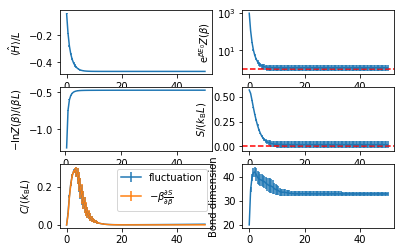

In [ ]:
### run RPMPS-T
!sed -i 's/^Sample.*/Sample = 32/g' setting.toml
!./RandomMPS
!cat sample_*.json
%run PlotJackknife.py